In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

La maladie coronarienne, ou coronaropathie,est une maladie chronique touchant les arteres qui nourrissent le coeur (arteres coronaires). Elle est causee
par l'atherosclerose, soit une accumulation de plaques de cholesterol, qui retrecissent (stenose) ou bouchent les vaisseaux. cette obstruction reduit l'apport d'oxygene, provoquant douleurs thoraciques (angine), fatigue et, en cas d'occlusion totale, un infarctus.
L'etude Framingham (Framingham Heart Study), debutee en 1948 dans le Massachusetts, est une recherche epidemologique fondamentale qui a identifie les principaux facteurs de risque cardiovasculaire (tabac, cholesterol, hypertension). Son score de risque permet d'evaluer la probablite d'un evenement cardiaque sur 10 ans.
Causes et facteurs de risque :
- Tabagisme
- Hypertenson arterielle
- Hypercholesterolemie : Exces de mauvais cholesterol (LDL)
- Diabete
- Heredite, age et sexe masculin (les femmes sont egalement concernees souvent plus tard).

## Description de la base de donnees
- male : indique si le patient est un homme (1) ou une femme (0).
- age : Age du patient en annees.
- education : niveau d'etucation du patient (1 a 4).
- currentSmoker :Indique si le patient est un fumeur actuel (1) ou non (0).
- cigPerDay : Nombre de cigarettes fumees par jour.
- BPMeds : Indique si le patient prend des medicaments contre l'hypertension (1) ou non (0).
- prevalentStroke : Indique si le patient a des antecedents d'AVC (1) ou non (0).
- prevalentHyp : Indique si le patient a des antecedents d'hypertension (1) ou non (0).
- diabetes : Indique si le patient est diabetique (1) ou non (0).
- totChol :Taux de cholesterol total du patient.
- sysBP : Pression arterielle systolique du patient.
- diaBP : Pression arterielle diastolique du patient.
- BMI : indice de masse corporelle du patient.
- heartRate : frequence cardiaque du patient.
- glucose : Taux de glucose du patient.
- TenYearCHD : Indique le risque a 10 ans de maladie coronarienne (1) ou non (0).

In [2]:
#Importation du fichier originale
df = pd.read_csv("..\\data\\framingham_heart_study.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.shape

(4240, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
#Nombre de donnees manquantes
nombre_valeurs_manquantes = df.isnull().sum().sum()
nombre_valeurs_manquantes

645

In [8]:
#Pourcentage de donnees manquantes
nombre_valeurs_manquantes / len (df) * 100

# On constate que les valeurs manquantes ici represente 15% du dataset, nous ne pouvons donc pas les supprimer. Nous optons pour une imputation

15.212264150943398

In [9]:
#Presence de valeurs manquantes
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
#Pourcentage des valeurs manquantes
df.isnull().mean() * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [12]:
#On constate qu'il n'y a pas de doublons
df.duplicated().sum()

0

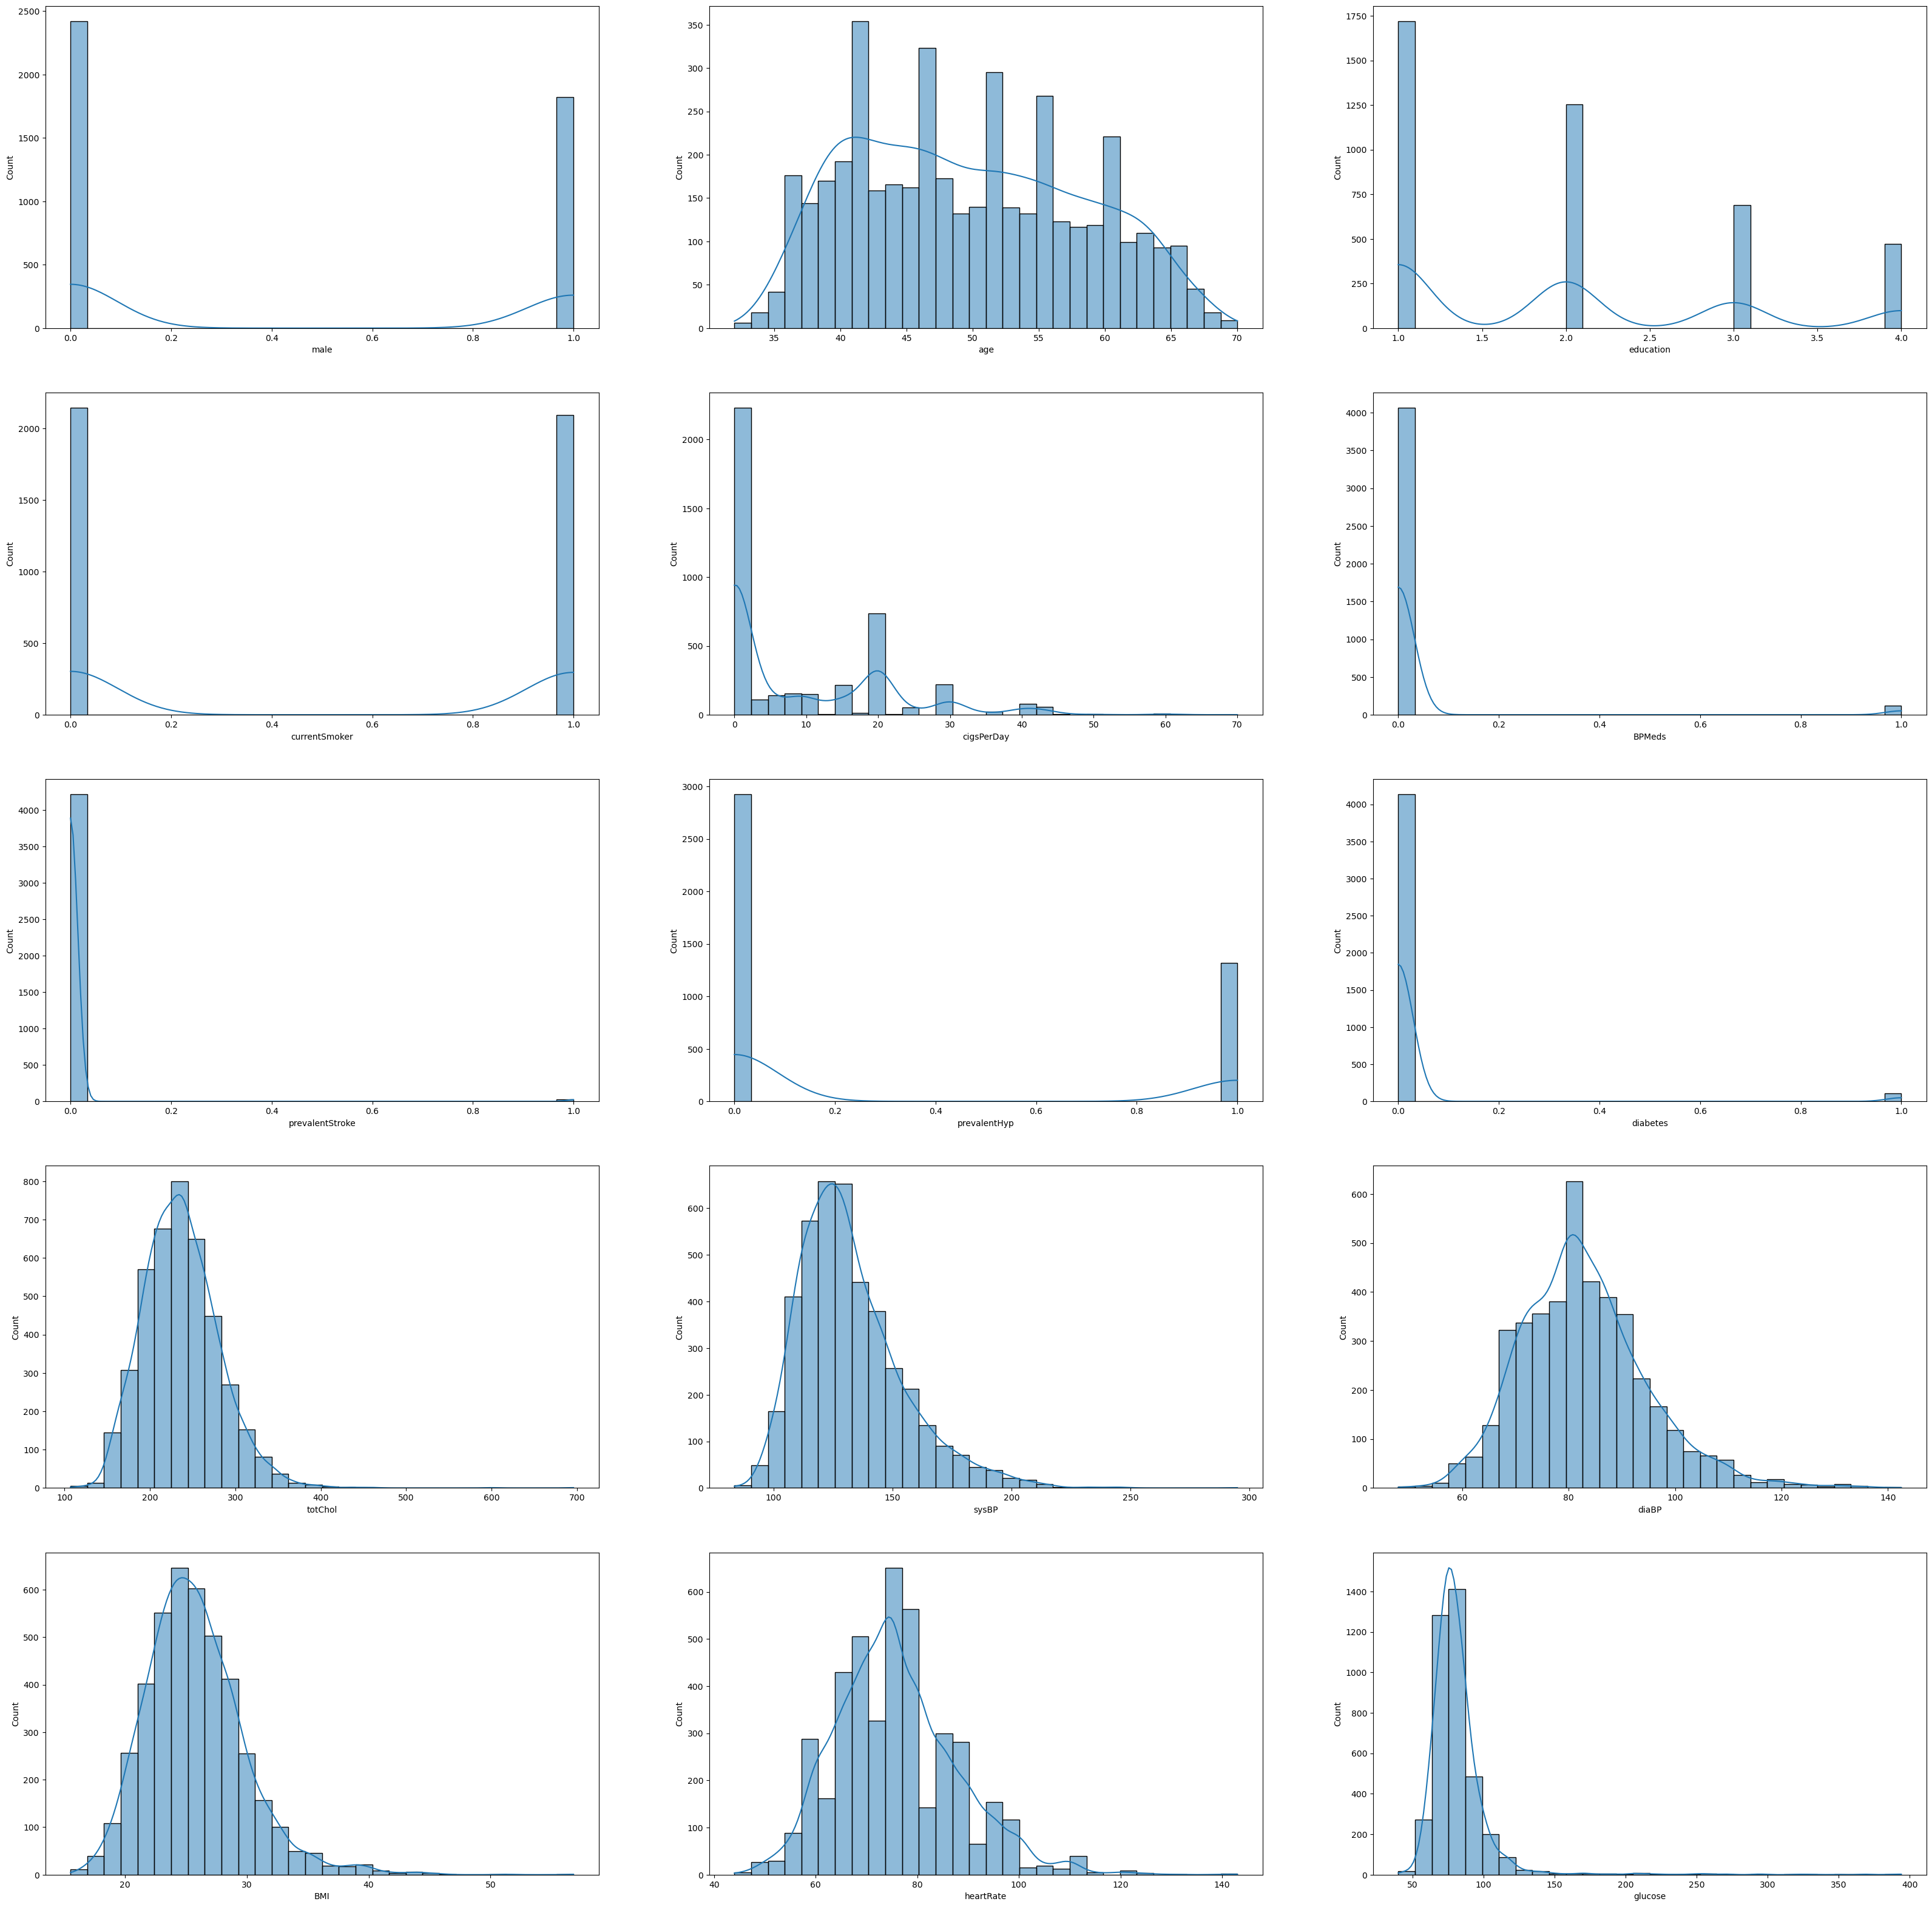

In [17]:
# Etudions les histogrammes de nos variables afin de decider d'emputer les valeurs manquantes par les valeurs statistique.
# Si nos donnees ont une distribution normale on utilisera les indicateurs statistiques pour l'imputation.
plt.figure(figsize = (40, 40))
for i, col in enumerate(df.columns.drop("TenYearCHD")) :
    plt.subplot(5, 3, i+1)
    sns.histplot(data = df, x = col, bins = 30, kde = True)

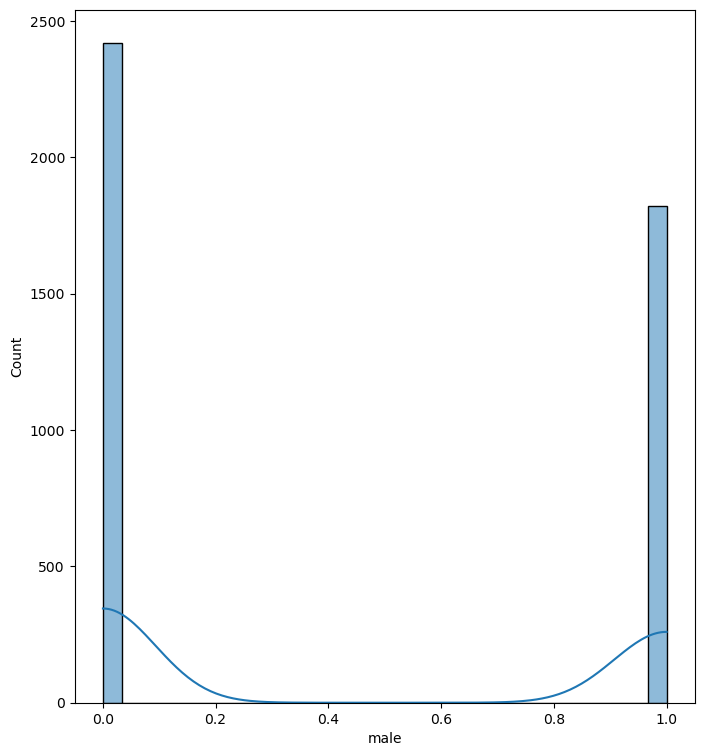

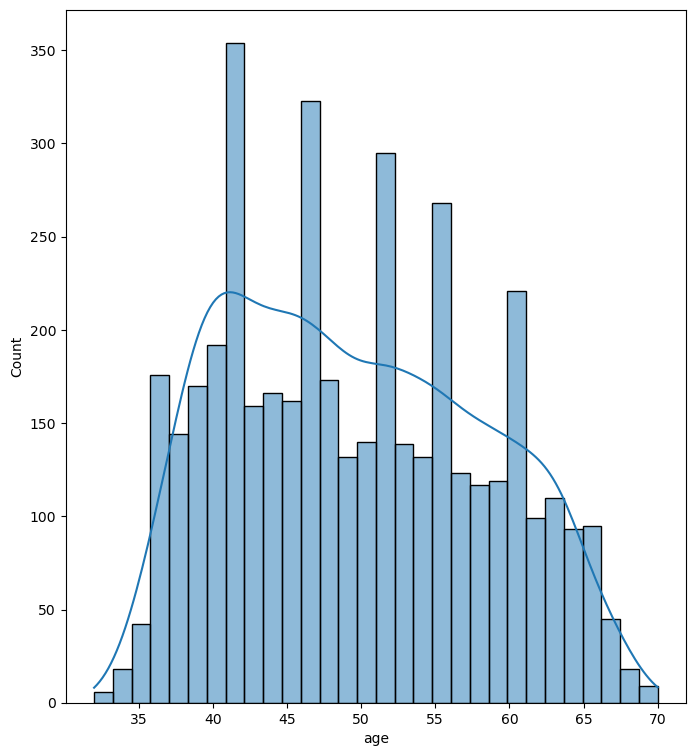

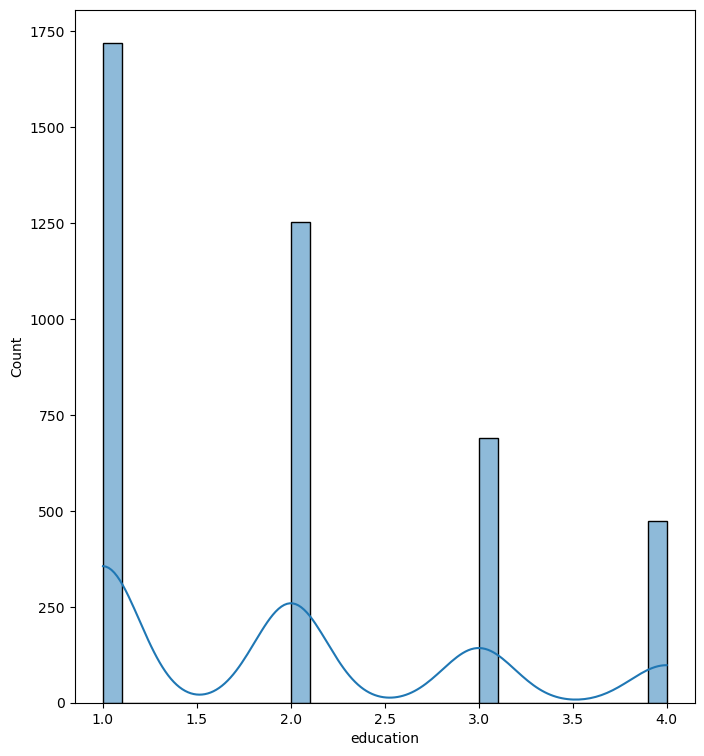

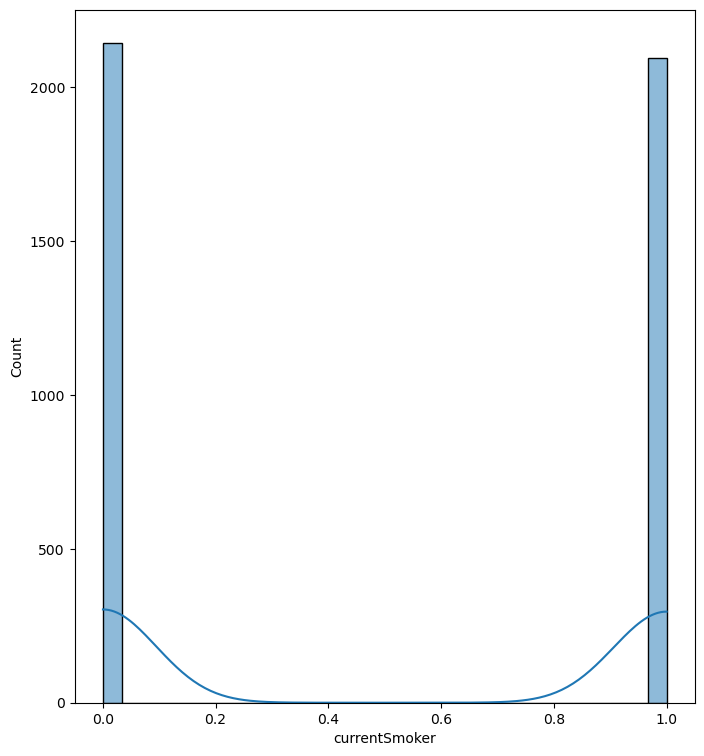

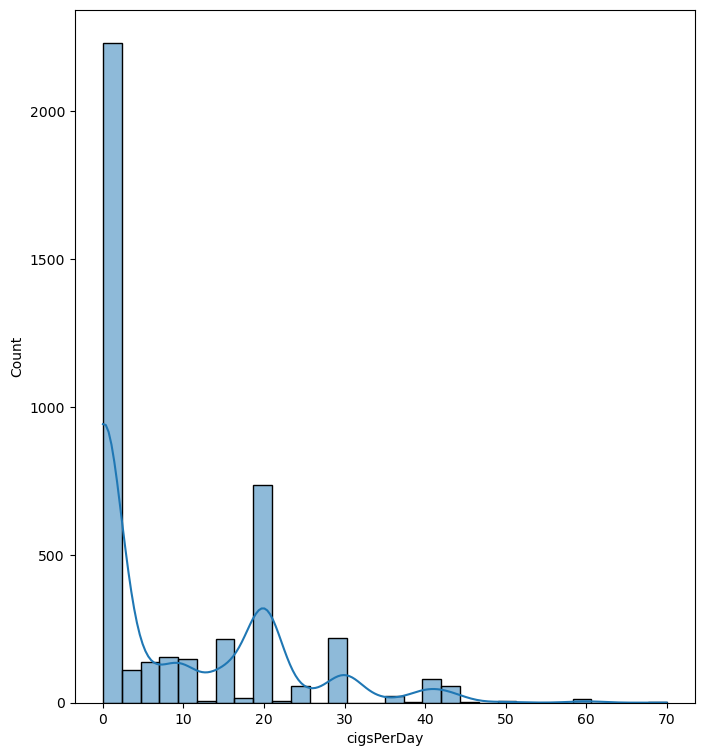

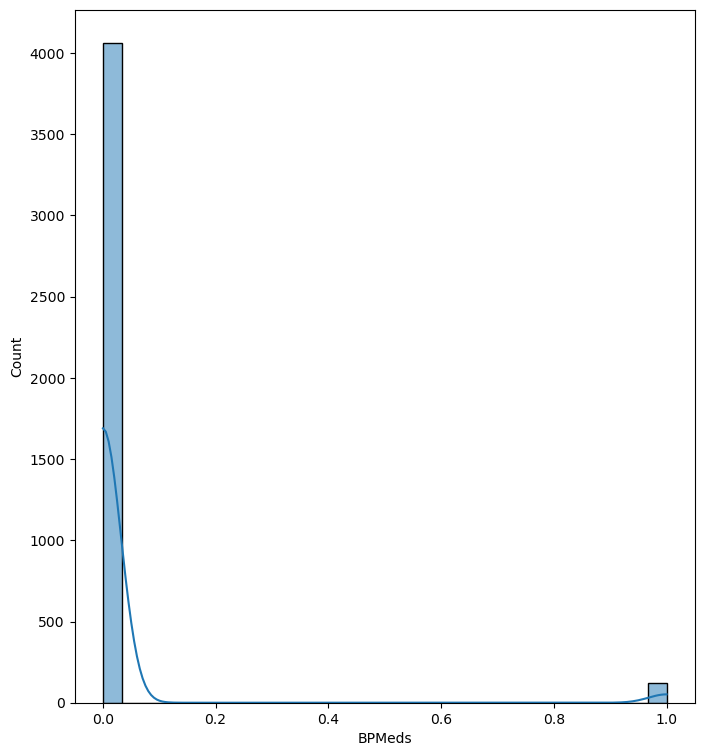

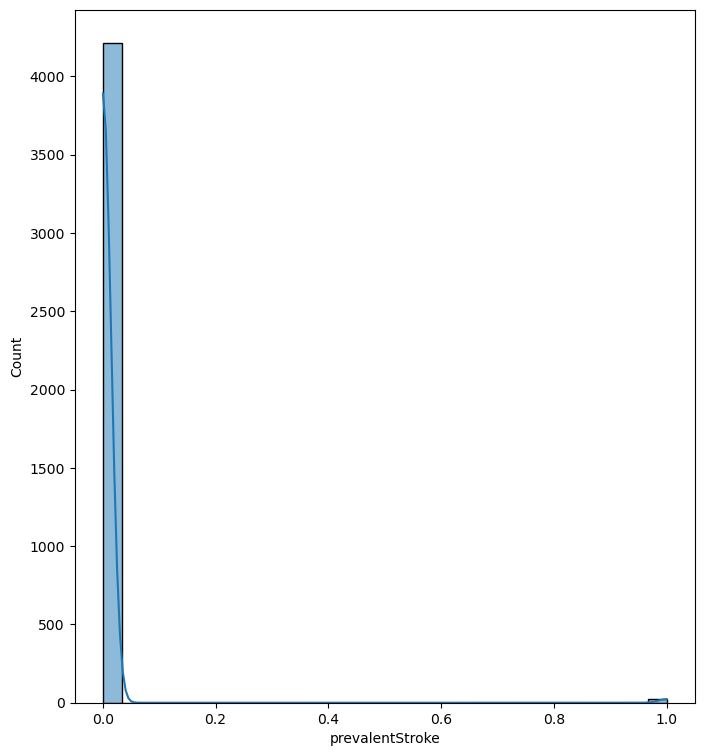

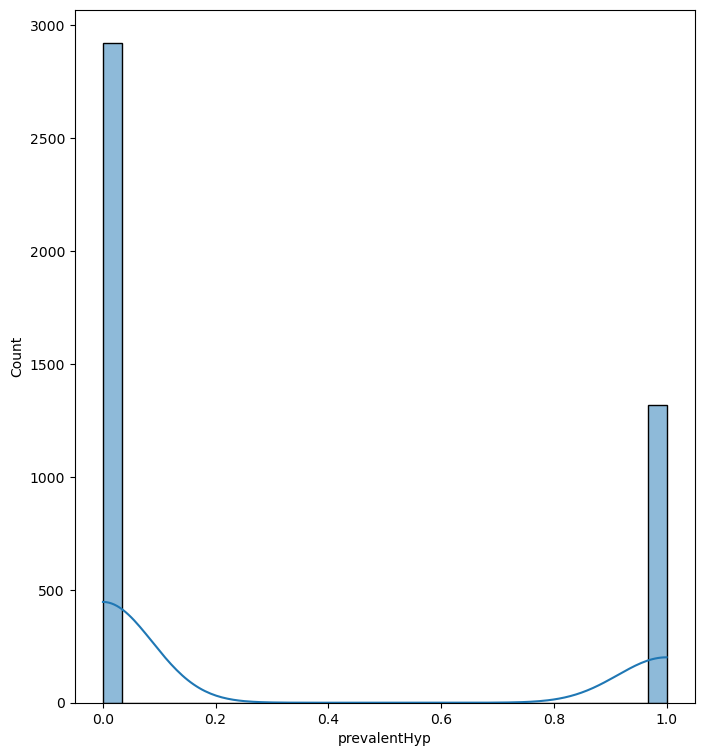

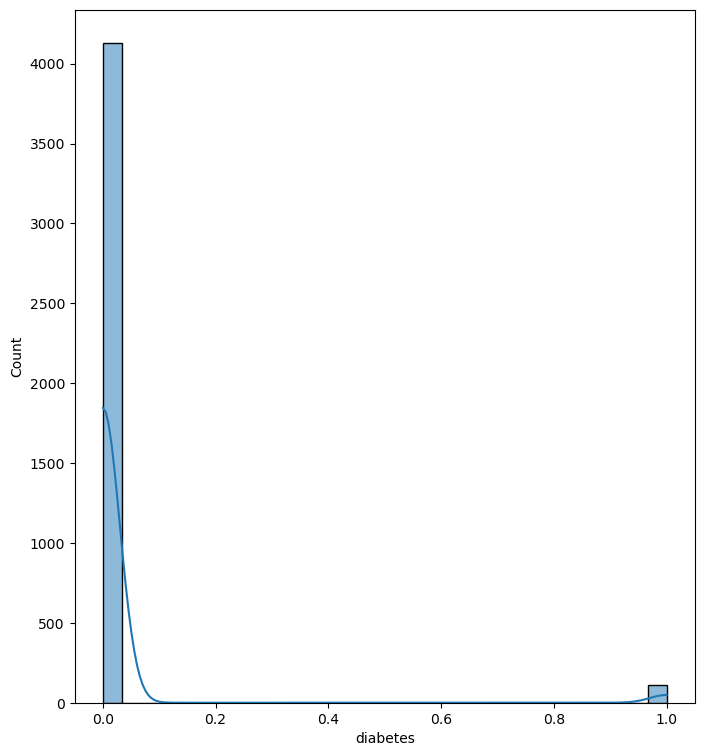

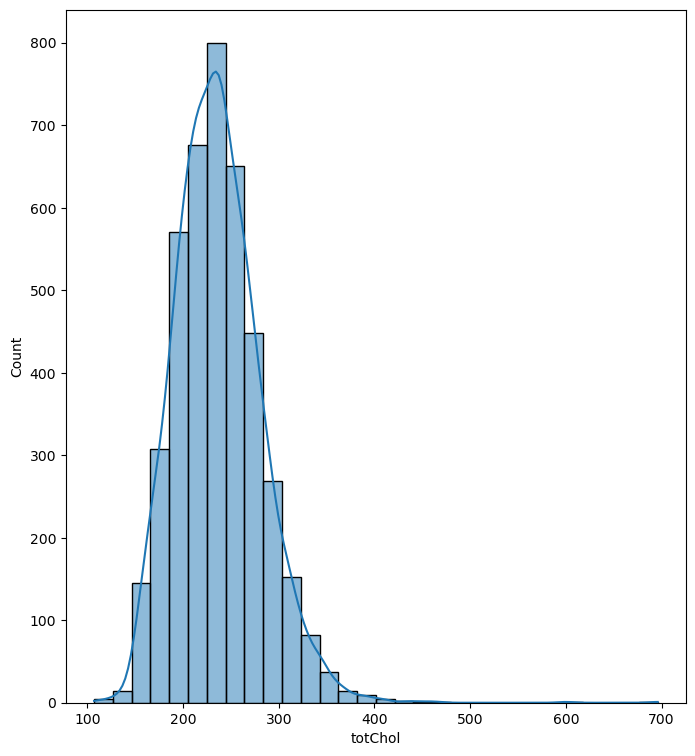

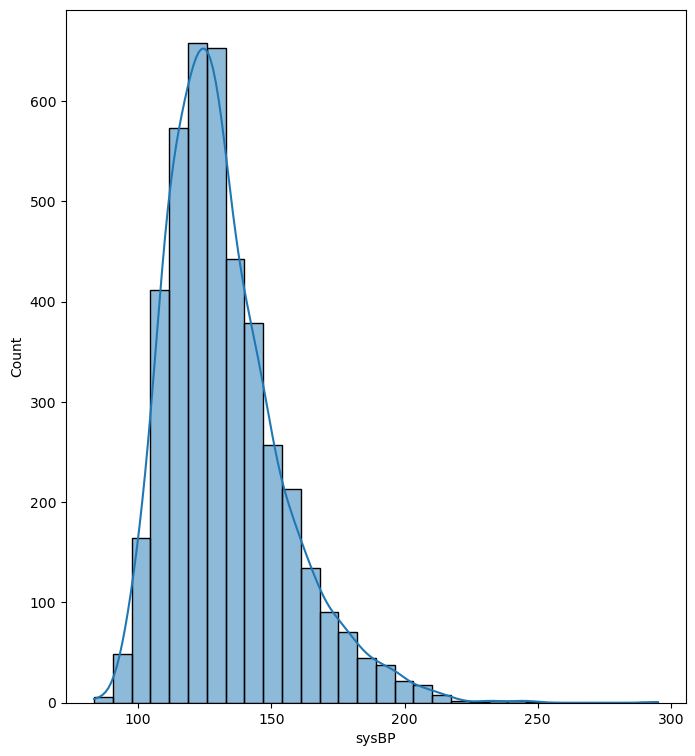

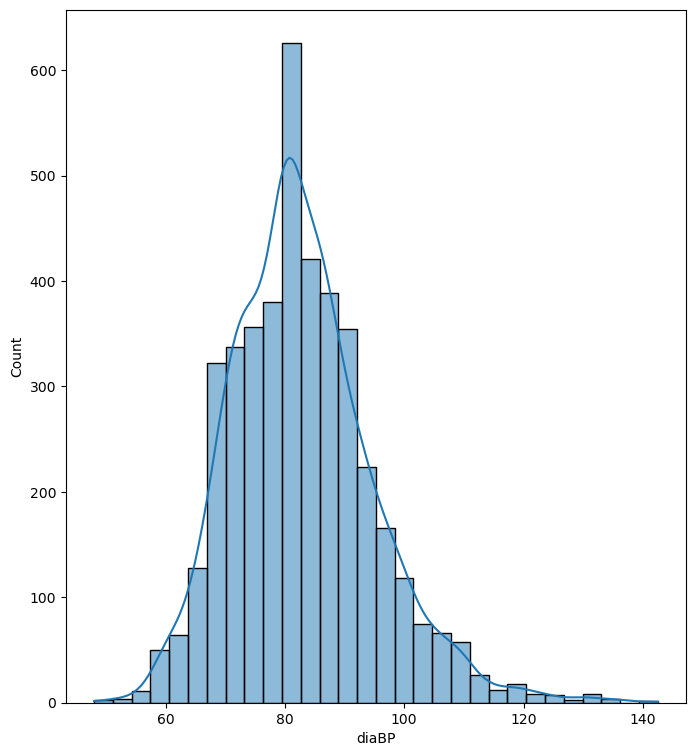

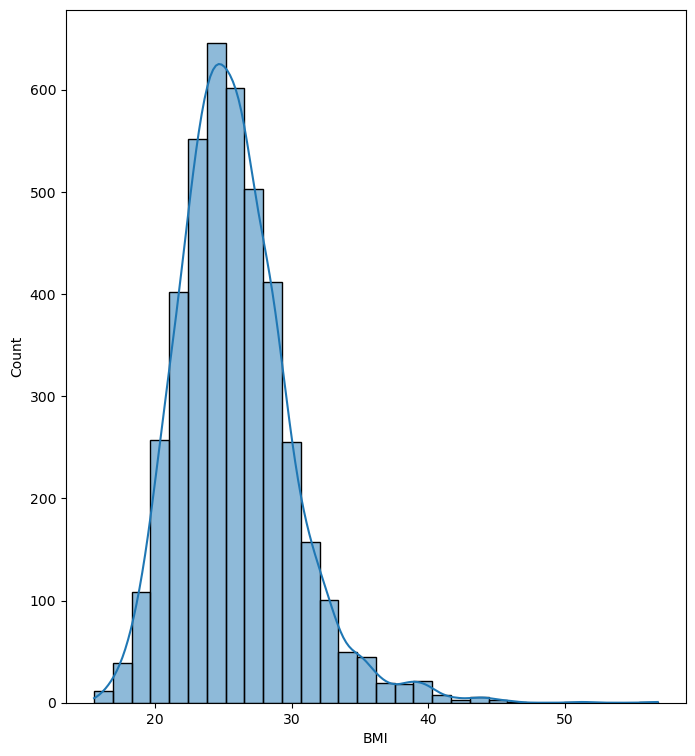

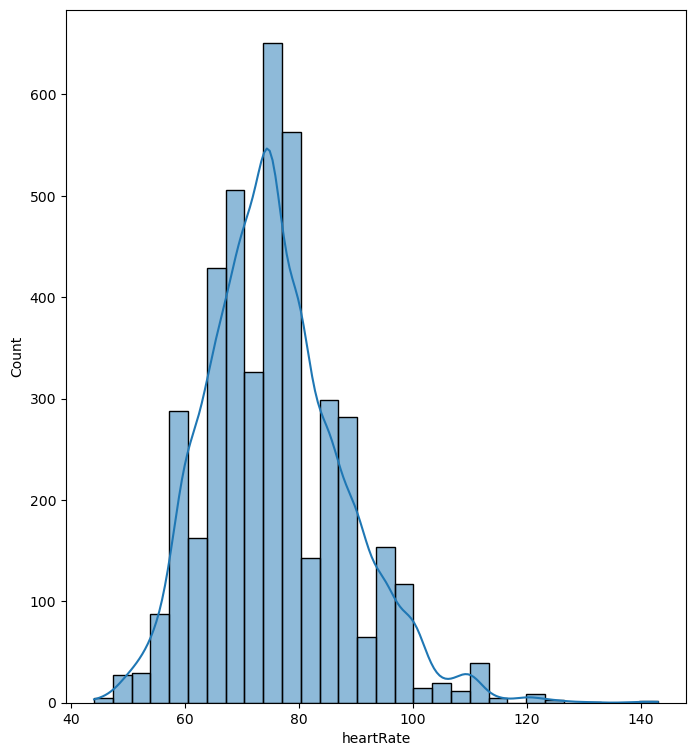

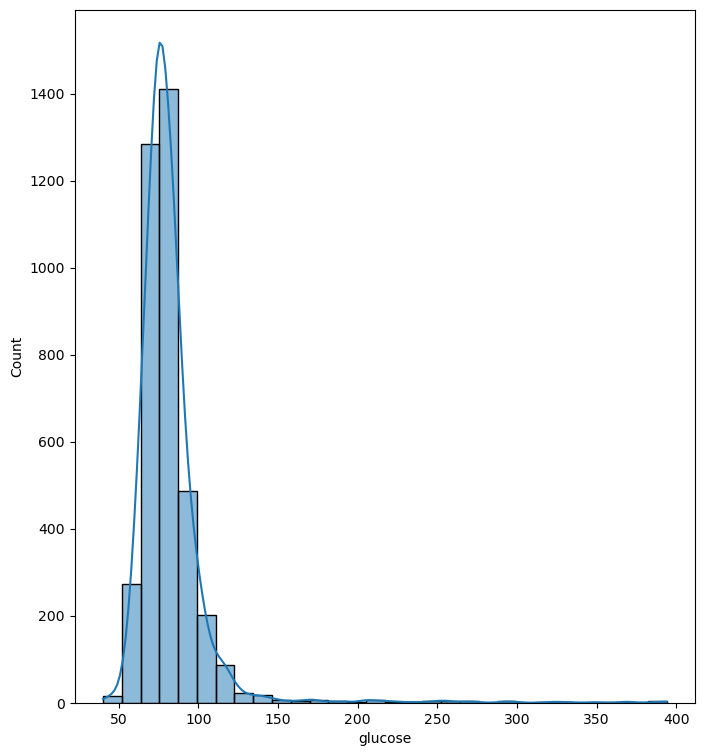

In [18]:
# Etudions les histogrammes de nos variables afin de decider d'emputer les valeurs manquantes par les valeurs statistique.
# Si nos donnees ont une distribution normale on utilisera les indicateurs statistiques pour l'imputation.

for col in df.columns.drop("TenYearCHD") :
    plt.figure(figsize = (8, 9))
    plt.title(f"Distribution de la colonne {col}")
    sns.histplot(data = df, x = col, bins = 30, kde = True)

#On constate donc que graohiquement aucunne de nos donnees ne suit une loi normale

In [30]:
#Effectuons un test de normalite pour confirmer le fait qu'aucune de nos donnees ne suit une loi normal
from scipy.stats import normaltest
colonne_distribution_normale = []
cols = df.columns.drop("TenYearCHD")
for col in cols :
    # nan_policy definit la maniere de gerer les NaN en entree. "omit" permet d'ignorer les nan lors du calcul.
    stat, p = normaltest(df[col], nan_policy = "omit") 
    if p < 0.05 :
        print(f"<{col}>  ne suit pas une loi normale")
    else :
        colonne_distribution_normale.append(col)
        print(f"<{col}>  suit une loi normale")

print(f"colonne suivant une loi normale : {colonne_distribution_normale}")

<male>  ne suit pas une loi normale
<age>  ne suit pas une loi normale
<education>  ne suit pas une loi normale
<currentSmoker>  ne suit pas une loi normale
<cigsPerDay>  ne suit pas une loi normale
<BPMeds>  ne suit pas une loi normale
<prevalentStroke>  ne suit pas une loi normale
<prevalentHyp>  ne suit pas une loi normale
<diabetes>  ne suit pas une loi normale
<totChol>  ne suit pas une loi normale
<sysBP>  ne suit pas une loi normale
<diaBP>  ne suit pas une loi normale
<BMI>  ne suit pas une loi normale
<heartRate>  ne suit pas une loi normale
<glucose>  ne suit pas une loi normale
colonne suivant une loi normale : []


<Axes: >

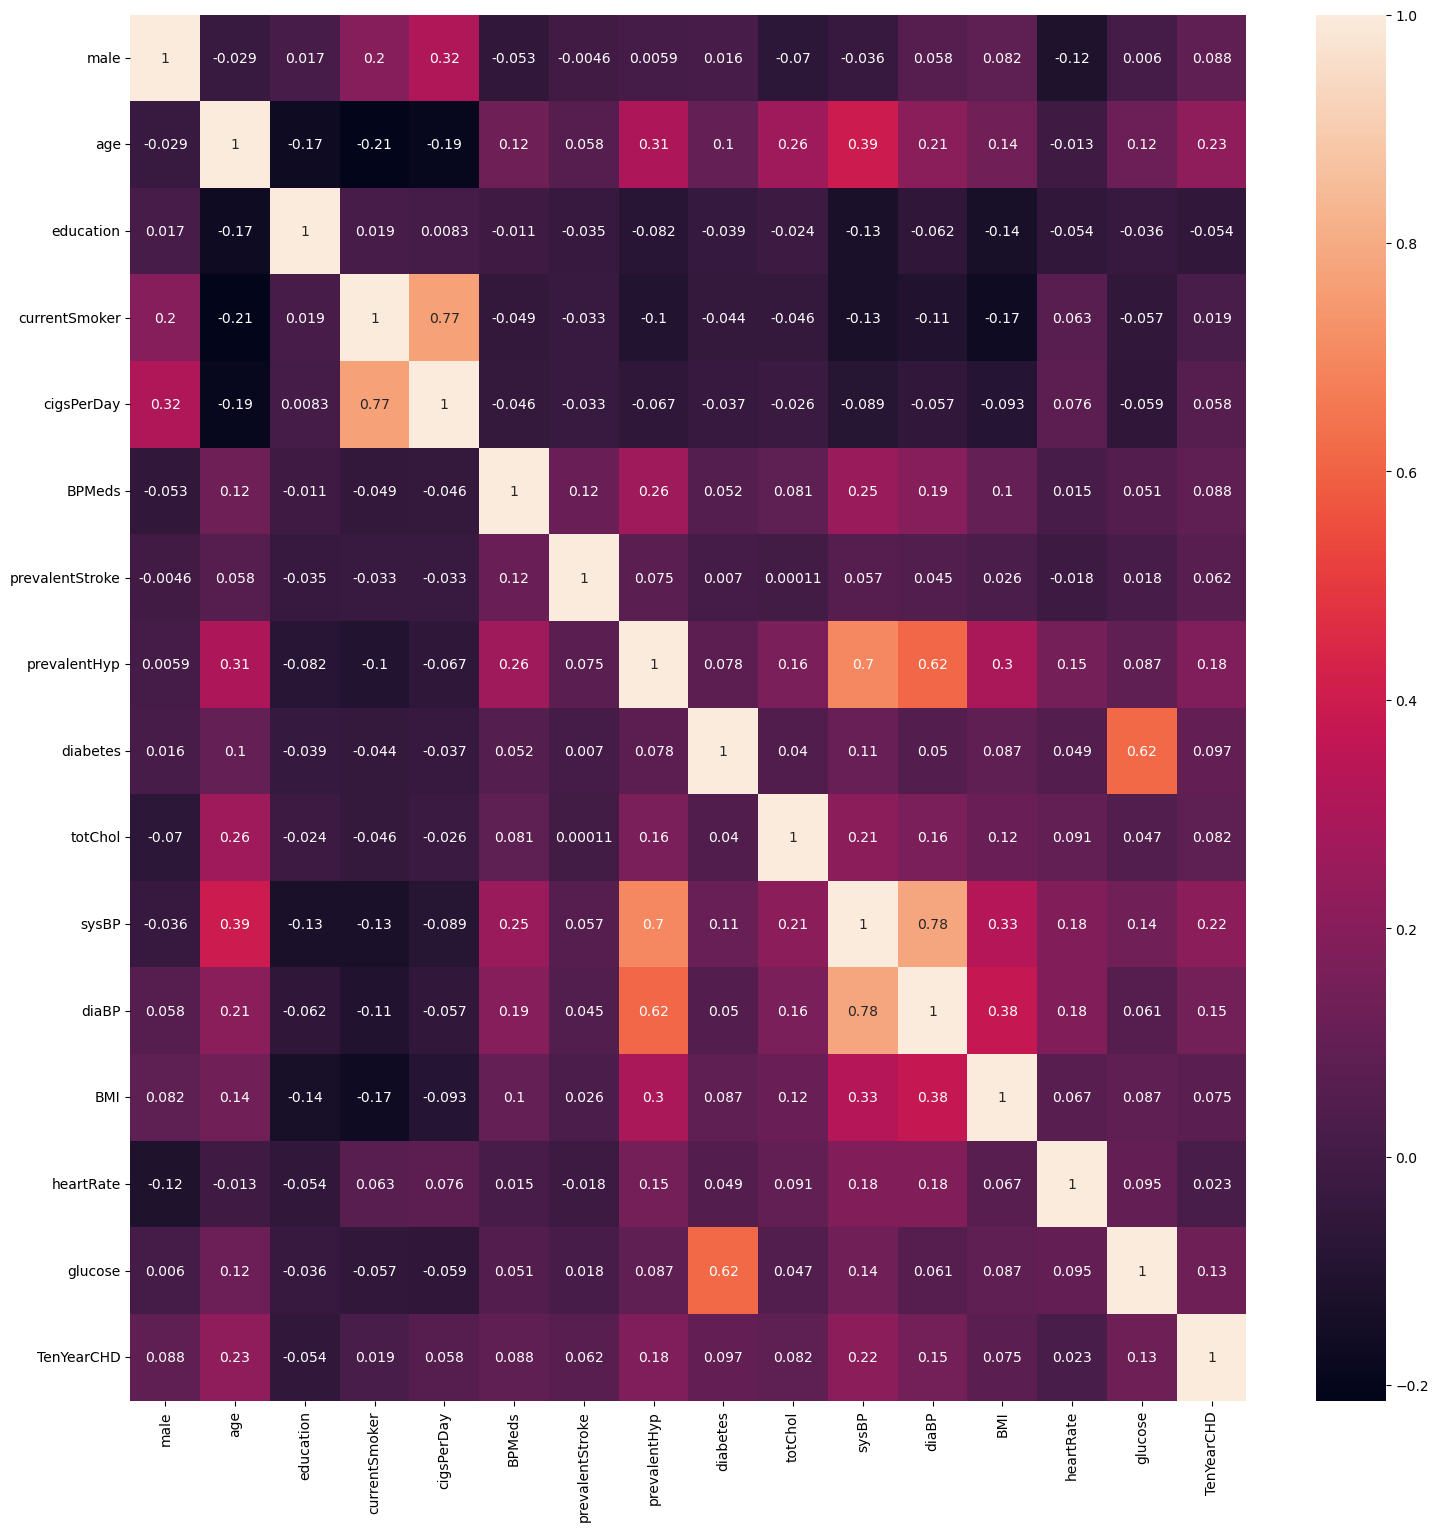

In [32]:
cor = df.corr()
plt.figure(figsize = (18, 18))
sns.heatmap(cor, annot = True)